
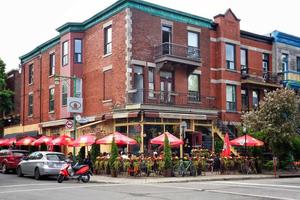

In [ ]:
from io import BytesIO
import PIL, os
import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image
from typing import Literal
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.messages import StructuredMessage
from autogen_agentchat.ui import Console
from autogen_ext.models.openai import OpenAIChatCompletionClient
from pydantic import BaseModel

# Create a multi-modal message with random image and text.
pil_image = PIL.Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = Image(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="user")
img


In [7]:
from dotenv import load_dotenv
import os
load_dotenv()
api_key = os.getenv("GEMINI_API_KEY")

In [2]:
print(multi_modal_message)

id='cf365bd7-f1c7-49e3-8610-c8c7cd0d2a79' source='user' models_usage=None metadata={} created_at=datetime.datetime(2026, 2, 20, 19, 48, 4, 228183, tzinfo=datetime.timezone.utc) content=['Can you describe the content of this image?', <autogen_core._image.Image object at 0x000002211EF20D70>] type='MultiModalMessage'


In [ ]:

class AgentResponse(BaseModel):
    photo_type: str
    content: str

model_client = OpenAIChatCompletionClient(model="gemini-2.5-flash", api_key= api_key)
agent = AssistantAgent(
    "assistant",
    model_client=model_client,
    system_message="Categorize the photo_type as restaurant, railway, or airport or come up with your own thoughts for photo_type and  follow the JSON format.",
    # Define the output content type of the agent.
    output_content_type=AgentResponse,
)

result = await Console(agent.run_stream(task=multi_modal_message))



---------- MultiModalMessage (user) ----------
Can you describe the content of this image?
<image>
---------- StructuredMessage[AgentResponse] (assistant) ----------
{"photo_type":"restaurant","content":"The image shows a vibrant street scene featuring a multi-story brick building with an outdoor patio area. The ground floor of the building appears to be a restaurant or cafe, identified by the numerous red umbrellas providing shade over tables where patrons are seated. There are also potted plants decorating the patio. Cars are parked along the street, and a red scooter is visible in the foreground. The architecture suggests an urban setting, possibly in a historic district."}


c:\Users\keith\implementations\MachineLearning_AI\Autogen\.venv\Lib\site-packages\pydantic\main.py:464: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected `none` - serialized value may not be as expected [field_name='parsed', input_value=AgentResponse(photo_type=...n a historic district.'), input_type=AgentResponse])
  return self.__pydantic_serializer__.to_python(


In [13]:
# Check the last message in the result, validate its type, and print the thoughts and response.
assert isinstance(result.messages[-1], StructuredMessage)
assert isinstance(result.messages[-1].content, AgentResponse)
print("Photo_type: ", result.messages[-1].content.photo_type)
print("Content: ", result.messages[-1].content.content)
await model_client.close()

Photo_type:  restaurant
Content:  The image shows a vibrant street scene featuring a multi-story brick building with an outdoor patio area. The ground floor of the building appears to be a restaurant or cafe, identified by the numerous red umbrellas providing shade over tables where patrons are seated. There are also potted plants decorating the patio. Cars are parked along the street, and a red scooter is visible in the foreground. The architecture suggests an urban setting, possibly in a historic district.
